# EDA

## EDA란?

데이터 그 자체에 적성과 특성을 육안으로 확인하는 과정  
즉, 데이터 분석하는 기술적 접근은 많지만 기술적 관점을 강조하다보니 데이터 그 자체에 소홀해지는 경향이 생겨 **데이터 그 자체**만으로부터 인사이트를 얻어내는 접근법을 뜻한다. 
- 시각화 과정 포함
- 통계적 수치 사용
- Numpy, Pandas 등에 쓰인 여러 컨테이너들을 사용

## EDA Process

1. 분석의 목적(분석 결과를 명확히 하기)과 변수(column ex. 의미, 타입 등) 확인
2. 데이터 전체적으로 살펴보기 (상관관계, 결측치, 데이터 사이즈 등 파악)
3. 데이터의 개별 속성 파악하기 (개별 속성들이 적절하게 매칭되어 있는지 파악 등)

## EDA Example - with Titanic

### 0. 라이브러리 준비

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv("./../titanic/train.csv")

### 1. 분석의 목적과 변수 확인
- 타이타닉 호의 생존자들은 어떤 특징을 가진 사람들일까?

In [4]:
# 상위 5개 데이터만 확인

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# 각 칼럼의 데이터 타입 확인하기

titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 2. 데이터 전체적으로 살펴보기

In [9]:
# 데이터 전체 정보를 얻는 함수: .describe()

titanic_df.describe() ## 수치형 데이터 요약만을 제공

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 상관계수 확인

titanic_df.corr()

## Correlation is NOT Causation
## 상관성 :A up, B up, ...
## 인관성: A -> B

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
# 결측치 확인

titanic_df.isnull()
titanic_df.isnull().sum()

## Age, Cabin, Embarked에서 결측치 발견~!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3. 데이터의 개별 속성 파악하기

**Survived Column**

In [5]:
# 생존자, 사망자 명수는?

titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df['Survived'].head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
titanic_df['Survived'].sum()

342

In [12]:
titanic_df['Survived'].value_counts() ## 각 데이터가 몇 번 등장했는 지 알 수 있음

0    549
1    342
Name: Survived, dtype: int64

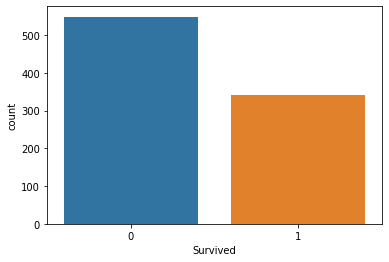

In [17]:
## 생존자, 사망자 수 Barplot으로 그려보기 sns.countplot()

sns.countplot(x='Survived', data=titanic_df)
plt.show()

**Pclass**

In [19]:
# Pclass에 따른 인원 파악

titanic_df[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [20]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'])

In [21]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [22]:
# 생존자 인원 파악

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [23]:
# 생존 비율

titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

### 'Pclass'와 'Survived'와 상관관계가 존재한다.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


[]

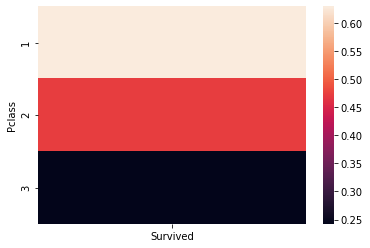

In [24]:
# 시각적으로 'Pclass'와 'Survived' 사이의 상관관계 알아보기

sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.plot()

**Sex**

In [27]:
titanic_df[['Sex', 'Survived']]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [35]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

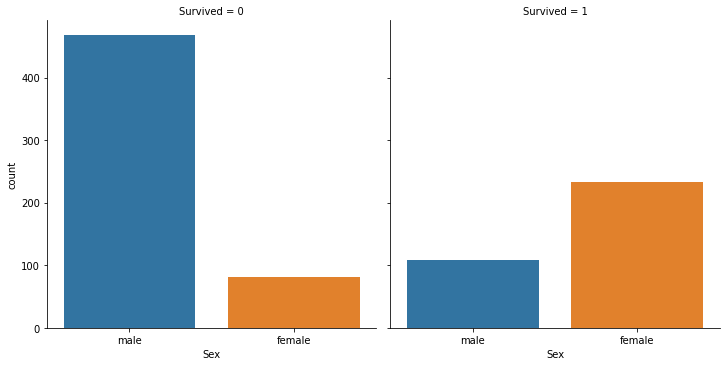

In [38]:
# 시각적으로 'Sex'와 'Survived' 사이의 상관관계 알아보기

sns.catplot(x='Sex',col='Survived' ,kind='count', data=titanic_df) ## col으로 매개변수 설정
plt.show()

**Age**  
*Remind: 결측치 존재*

In [40]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

**subplot**  
- subplot은 어떤 ploting 하는 경우 여러 개의 plot을 한번에 보여줄 때 사용
- subplot(가로, 세로) 가로에는 몇 개 세로에는 몇 개의 plot을 그릴 지 설정
**figsize**  
- figure(그래프에 대한 도면) -> axis(figure 안에 있는 각각의 x축과 y축에 있는 틀) -> plot(틀 위에 plot을 그려짐)

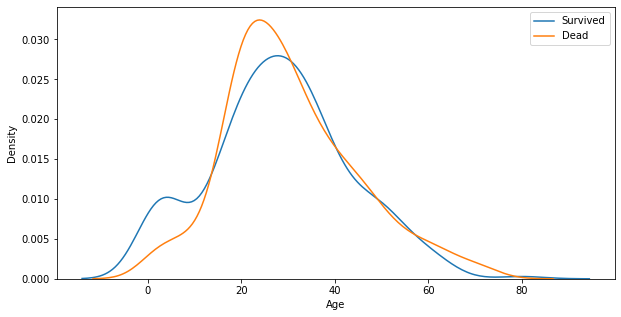

In [45]:
# Survivied, Age의 경향성

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

**Sex + Pclass vs Survived**

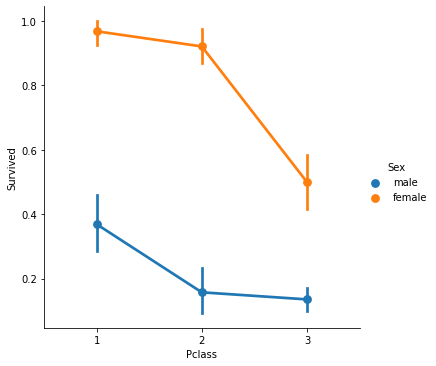

In [49]:
sns.catplot(x='Pclass', y='Survived',hue='Sex', kind='point', data=titanic_df)

plt.show()

**Age + Pclass**

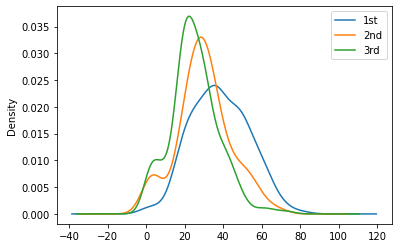

In [55]:
titanic_df['Age'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Age'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st', '2nd', '3rd'])
plt.show()

## Assignment

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.
**Hint : Fare? Sibsp? Parch?**

In [57]:
titanic_df[['Fare', 'Survived']]

titanic_df[['Fare', 'Survived']].groupby(['Fare']).sum() ## Fare은 이산형 변수임을 고려해야 함

,Survived
Fare,
0.0000,1
4.0125,0
5.0000,0
6.2375,0
6.4375,0
...,...
227.5250,3
247.5208,1
262.3750,2


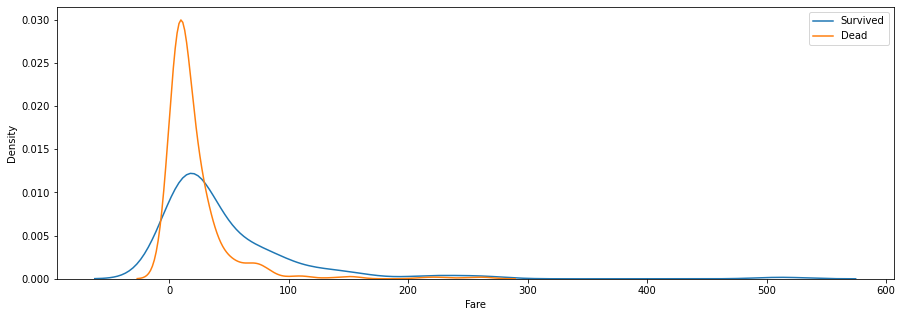

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Fare'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Fare'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

### Fare 0 ~ 50 사이가 가장 많이 사망 그 외에는 생존자가 사망자 역전

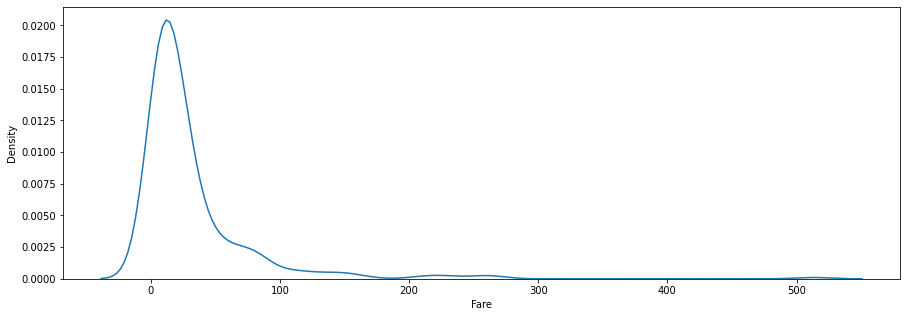

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(x=titanic_df['Fare'])
plt.show()

### Dead와 Survived가 둘 다 높은 구간의 경우 단순히 그 구간에 사람이 많은 것으로 판별
### 그러나 낮은 Fare의 경우 왜 Survived가 높은 것인지 의문?

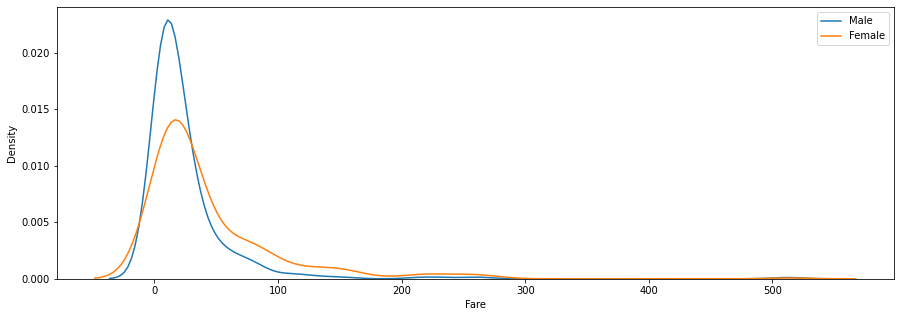

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(x=titanic_df[titanic_df.Sex == 'male']['Fare'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Sex == 'female']['Fare'], ax=ax)

plt.legend(['Male', 'Female'])

plt.show()

### 낮은 Fare의 경우 여성이 많아 위 같은 방향성이 나온 것으로 판단된다.

In [92]:
titanic_df[['Embarked', 'Survived']].groupby(['Embarked']).mean()

### Cherbourg, Queenstown, Southampton 세 항구 중 Cherbourg가 유난히 높은 생존률을 보이고 있음

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


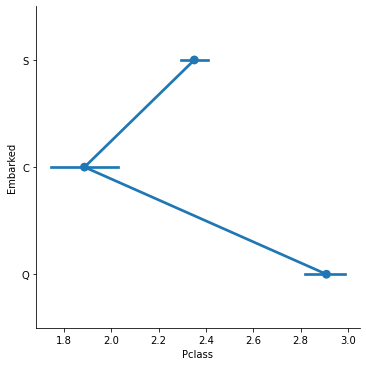

In [118]:
sns.catplot(x='Pclass', y='Embarked', kind='point', data=titanic_df)

plt.show()

### Cherbourg의 경우 높은 등급의 좌석을 가진 사람이 많기 때문에 위와 같은 상관관계가 나온 듯 하다.

**과제 1**  
> 과제 1의 경우 운임 요금과 승선 장소에 따라 생존 정도를 알아보았습니다.  
하나의 데이터로만 판별되는 것은 없으며 데이터 전체가 엮여 있는 것을 깨닫게 되었습니다.

### 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화 해봅시다.

**Hint**

1. 데이터를 톺아봅시다.
    - 각 데이터는 어떤 자료형을 가지고 있나요?
    - 데이터에 결측치는 없나요? 있다면 어떻게 메워줄까요?
    - 데이터의 자료형을 바꿔줄 필요가 있나요? (ex. 범주형의 One-hot encoding)
2. 데이터에 대한 가설을 세워봅시다.
    - 가설은 개인의 경험에 의해서 도출되어도 상관없습니다.
    - 가설은 명확할 수록 좋습니다.
3. 가설을 검증하기 위한 증거를 찾아봅시다.
    - 이 증거는 한 눈에 보이지 않을 수 있습니다. 우리가 다룬 여러 Technique를 써줘야합니다.
    - `.gorupby()`를 통해서 그룹화된 정보에 통계량을 도입하면 어떨까요?
    - `.merge()`를 통해서 두 개 이상의 dataFrame을 합치면 어떨가요?
    - 시각화를 통해 일목요연하게 보여주면 더 좋은 자료가 됩니다.

In [147]:
student_perform = pd.read_csv("./../StudentsPerformance/StudentsPerformance.csv")

In [148]:
student_perform.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [73]:
student_perform.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [74]:
student_perform.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [151]:
student_perform['average'] = student_perform.mean(axis=1)

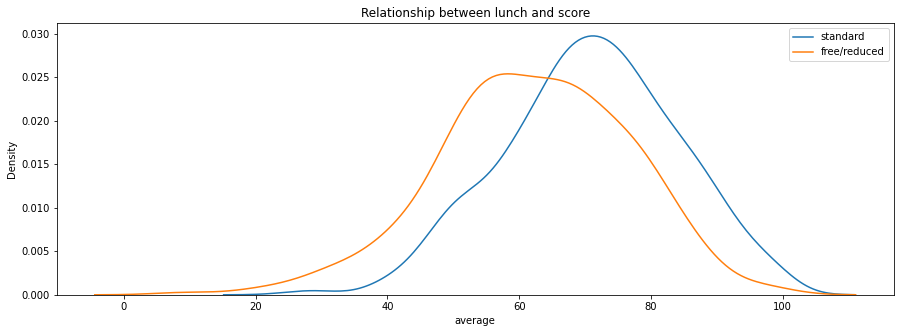

In [103]:
# 1. 점심 식사를 먹지 않았을 경우 성적에 악영향을 끼칠 것이다.

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(x=student_perform[student_perform.lunch == 'standard']['average'], ax=ax)
sns.kdeplot(x=student_perform[student_perform.lunch == 'free/reduced']['average'], ax=ax)

plt.title('Relationship between lunch and score')
plt.legend(['standard', 'free/reduced'])

plt.show()

### 실제로 밥을 먹은 학생의 성적 평균 분포가 높은 쪽으로 치우쳐져있다.

In [81]:
# 2. 수학이란 논리에 의해 규칙을 발견하는 학문으로 논리를 파악하기 위한 읽기 성적과 상관관계가 있을 것으로 예상된다!

student_perform.corr()

### 실제로 상관계수가 과목들 간 전부 0.5 이상으로 높은 편이다.

,math score,reading score,writing score,average
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
average,0.918746,0.970331,0.965667,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

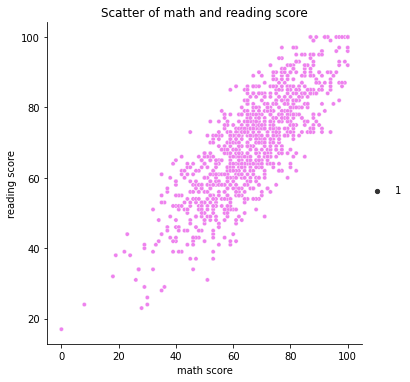

In [133]:
sns.relplot(data=student_perform, x="math score", y="reading score", size = 1, color = 'violet')

plt.title('Scatter of math and reading score')
plt.xlabel('math score')
plt.ylabel('reading score')

plt.show

### 산점도 상에서 높은 양의 상관관계를 보임을 알 수 있다.

In [146]:
# 3. 부모의 교육 수준이 높을수록 성적이 높을 것이다.

student_perform['parental level of education'].value_counts()

3              226
4              222
high school    196
1              179
5              118
6               59
Name: parental level of education, dtype: int64

In [154]:
student_perform[['parental level of education', 'average']].groupby(['parental level of education']).count()

,average
parental level of education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179


In [156]:
student_perform[['parental level of education', 'average']].groupby(['parental level of education']).mean()

### 대략 학력이 높으면 성적 수준이 높아보이지만 한눈에 알아보기 쉽지 않다.

,average
parental level of education,
associate's degree,69.569069
bachelor's degree,71.923729
high school,63.096939
master's degree,73.598870
some college,68.476401
some high school,65.108007


In [157]:
parental_edu_level = {"some high school" : 1, "high school" : 2, "some college" : 3, "associate's degree" : 4, "bachelor's degree" : 5, "master's degree" : 6}

student_performance = student_perform.replace({'parental level of education' : parental_edu_level})

### 눈에 보기 쉽게 'parental level of education' 칼럽 안에 있는 값을 변경하였다.

In [158]:
student_performance.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,5,standard,none,72,72,74,72.666667
1,female,group C,3,standard,completed,69,90,88,82.333333
2,female,group B,6,standard,none,90,95,93,92.666667
3,male,group A,4,free/reduced,none,47,57,44,49.333333
4,male,group C,3,standard,none,76,78,75,76.333333


In [160]:
student_performance[['parental level of education', 'average']].groupby(['parental level of education']).mean()


### 근소한 차이지만 부모의 교육 수준이 높을수록 학생의 성적이 높다.

,average
parental level of education,
1,65.108007
2,63.096939
3,68.476401
4,69.569069
5,71.923729
6,73.598870


<AxesSubplot:xlabel='parental level of education', ylabel='average'>

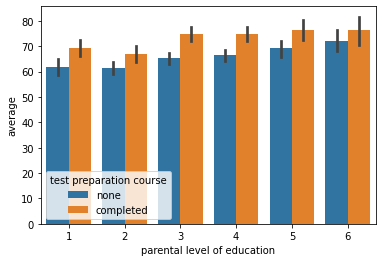

In [173]:
sns.barplot(x='parental level of education',y='average', hue = 'test preparation course', data=student_performance)

### 막대그래프로 시각회해서 보면 특히 시험 준비 과정을 완수하지 않는 학생의 경우 그러한 차이를 더욱 뚜렷하게 보여주고 있다.

**과제 2**  
> 과제 2는 데이터 고르는 것부터 난제였습니다..   
kaggle에 데이터 중 결측치 값이 많거나 혹은 이미지 데이터인 경우가 많아 데이터를 찾는 것이 다소 힘들었습니다.  
또한 제가 상상 밖의 이야기를 생각하는 것이 힘든 것인지 몰라도, 데이터를 보고 어떠한 관계를 떠올리는 것이 특히 힘들었습니다.  
그렇게 데이터를 여러번 바꾸다가 정착한 데이터가 바로 이 데이터입니다.  
단순한 데이터라 관계를 생각하는게 쉬웠고 다만 앞으로 EDA의 경우 더욱 복잡한 데이터를 다뤄보는 것이 필요하다고 느꼈습니다.  
위 데이터를 분석하는 중 식사 데이터를 보고 많이 놀랐습니다.  
평소에 끼니를 잘 챙겨 먹지만 시험 기간의 경우 끼니를 거르는 경우가 많은데 위와 같은 결과를 보고 밥의 중요성을 새삼 느꼈습니다.  
이러한 평소의 생각을 데이터를 통해 수학처럼 완전히 증명된 것은 아니지만 근거가 된다는 것으 아주 재미있었습니다.  
또한 이걸 하면서 여러 라이브러리를 다루는 방법을 좀 더 익혀야겠다는 생각이 들었습니다.